In [1]:
from uproot_io import Events, View
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
titlesize = 20
labelsize = 14

In [2]:
# Interaction type lookup
import csv
interaction_dictionary = {}
with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction

In [3]:
events = Events(r"C:\Users\andre\Desktop\Physics Project\bigdata\PandoraRecoFile_1.root")

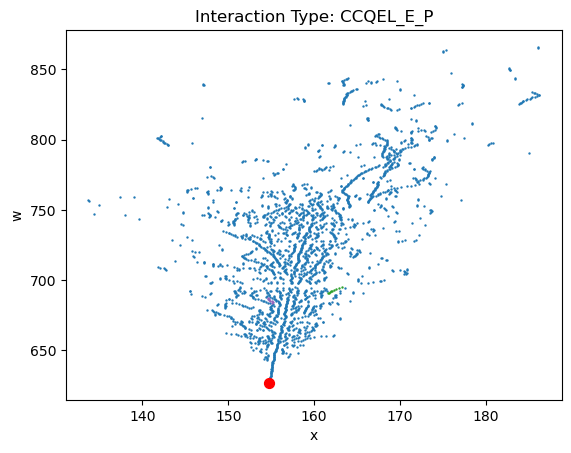

In [4]:
def plotparticles(event_number):
    idx = np.where(events.event_number == event_number)[0]
    
    for i in idx:
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        plt.scatter(x, z, s=0.5)
    
    vx = events.true_neutrino_vtx_x[idx[0]]
    vz = events.true_neutrino_vtx_w[idx[0]]
    plt.scatter(vx, vz, c='red', s=50)
    
    typ = events.interaction_type[idx[0]]
    name = interaction_dictionary[typ]
    
    plt.title(f'Interaction Type: {name}')
    plt.xlabel('x')
    plt.ylabel('w')

plotparticles(1572)

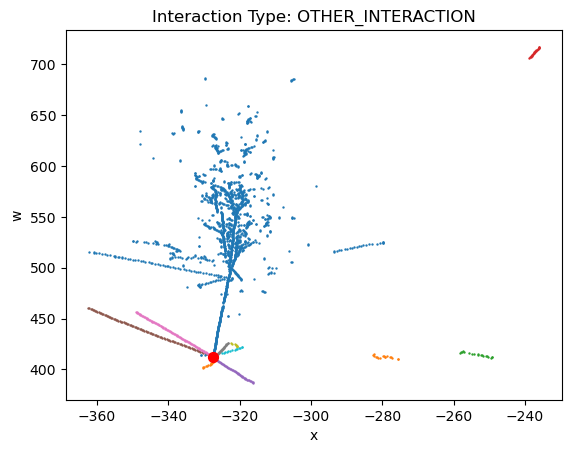

In [5]:
plotparticles(6)

TypeError: Improper input: func input vector length N=2 must not exceed func output vector length M=1

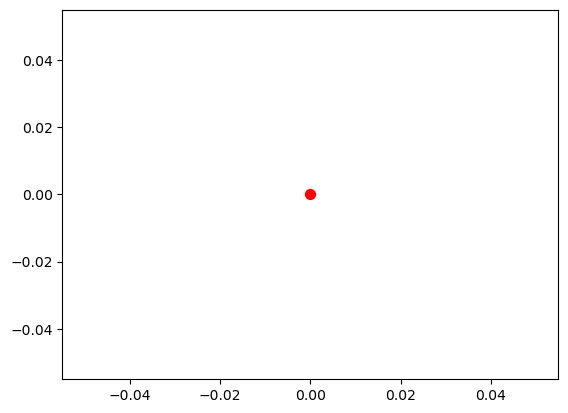

In [6]:
from scipy.optimize import curve_fit

def linear_function(x, m, c):
    return (m*x) + c

def straightlinefit(event_number):
    idx = np.where(events.event_number == event_number)[0]
    #v = 1
    residuals = []
    
    for i in idx:
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        plt.scatter(x, z, s=0.5)
        
        vx = events.true_neutrino_vtx_x[idx[0]]
        vz = events.true_neutrino_vtx_w[idx[0]]
        plt.scatter(vx, vz, c='red', s=50)
        x = np.append(x, vx)
        z = np.append(z, vz)
        
        params, covariance = curve_fit(linear_function, x, z)
        m, c = params
        
        y_fit = linear_function(x, m, c)
        plt.plot(x, y_fit)
        

        #fit = np.polyfit(x, z, 1)
        #y = (fit[0]*x) + fit[1]
        #plt.plot(x, y)
        
        #res = np.abs(z - y)
        #mean = np.mean(res)
        #print(f"Particle {v}:", mean)
        #v += 1
        #residuals.append(mean)
    #return np.array(residuals)

    
straightlinefit(685)

[0.71248084 0.29948542 0.79609025 1.1201072  0.8018355  0.04402669
 0.05460205 0.08327637]


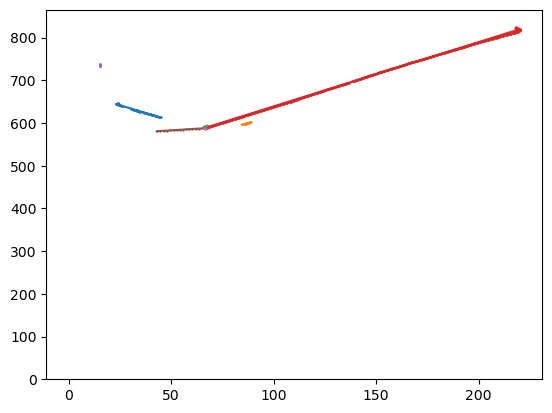

In [7]:
def straightlinefit(event_number):
    idx = np.where(events.event_number == event_number)[0]
    #v = 1
    residuals = []
    
    for i in idx:
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        plt.scatter(x, z, s=0.5)
        
        fit = np.polyfit(x, z, 1)
        y = (fit[0]*x) + fit[1]
        plt.plot(x, y)
        
        res = np.abs(z - y)
        mean = np.mean(res)
        #print(f"Particle {v}:", mean)
        #v += 1
        residuals.append(mean)
    return np.array(residuals)

numbers = straightlinefit(0)
print(numbers)
plt.hist(numbers, 21)
plt.show()

In [ ]:
def alldatafit():
    #idx = events.event_number
    residuals = []
    
    for i in events.event_number:
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        
        if x.size == 0:
            continue
        else:
            fit = np.polyfit(x, z, 1)
            y = (fit[0]*x) + fit[1]
            
            res = np.abs(z - y)
            mean = np.mean(res)
            residuals.append(mean)
    return np.array(residuals)

#numbers = alldatafit()
#number1 = set(numbers)
#plt.hist(number1, 100)
#plt.xlim(0, 50)
#plt.show()

In [ ]:
def fit_line(x, y):
    A = np.vstack([x, np.ones_like(x)]).T
    m, b = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, b

# Define a function to calculate the residuals
def calculate_residuals(x, y, m, b):
    y_predicted = (m*x) + b
    perpdist = abs(((-m*x) + y - b) / np.sqrt(m**2 + 1))
    #residuals = np.abs(perpdist - y_predicted)
    return perpdist

# RANSAC parameters
max_iterations = 1000
sample_size = 2
inlier_threshold = 2.0  # Adjust this value to change the tolerance for inliers

def inlierplot(event_number):
    idx = np.where(events.event_number == event_number)[0]
    
    vx = events.true_neutrino_vtx_x[idx[0]]
    vz = events.true_neutrino_vtx_w[idx[0]]
    plt.scatter(vx, vz, c='red', s=50)
    
    xmax = -1000
    xmin = 1000
    zmax = -1000
    zmin = 1000
    for i in idx:
        x0 = events.reco_hits_x_w[i]
        z0 = events.reco_hits_w[i]
        plt.scatter(x0, z0, s=0.5)
        if len(x0) > 0:
            if max(x0) >= xmax:
                xmax = max(x0)
            if min(x0) <= xmin:
                xmin = min(x0)
        if len(z0) > 0:
            if max(z0) >= zmax:
                zmax = max(z0)
            if min(z0) <= zmin:
                zmin = min(z0)
    
    if vx < xmin:
        xmin = vx    
    if vx > xmax:
        xmax = vx
    if vz < zmin:
        zmin = vz    
    if vz > zmax:
        zmax = vz
    
    xlen = 0.1*(xmax - xmin)
    zlen = 0.1*(zmax - zmin)
    plt.xlim(xmin-xlen, xmax+xlen)
    plt.ylim(zmin-zlen, zmax+zlen)
    plt.show()
    
    plt.scatter(vx, vz, c='red', s=50)
    plt.xlim(xmin-xlen, xmax+xlen)
    plt.ylim(zmin-zlen, zmax+zlen)
    
    for i in idx:
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        plt.scatter(x, z, s=0.5)
                
        best_inliers = []
        best_model = None
        sample_size = 2
        
        for _ in range(max_iterations):
            # Randomly sample data points
            sample_size = min(sample_size, len(x))
            sample_indices = np.random.choice(len(x), size=sample_size, replace=False)
            x_sample = x[sample_indices]
            z_sample = z[sample_indices]

            # Fit a line to the sampled data points
            m, b = fit_line(x_sample, z_sample)

            # Calculate residuals for all data points
            residuals = calculate_residuals(x, z, m, b)

            # Find inliers based on the threshold
            inliers = np.where(residuals < inlier_threshold)[0]

            if len(inliers) > len(best_inliers):
                best_inliers = inliers
                best_model = (m, b)

        # Check if inliers were found
        if len(best_inliers) > 0:
            # Use the best model and inliers to fit the final line
            m, b = best_model

            # Visualize the inlier data points and the fitted line
            x_inliers = x[best_inliers]
            z_inliers = z[best_inliers]

            plt.scatter(x_inliers, z_inliers, label='Inliers', color='blue', marker='o')
            plt.plot(x, m * x + b)
            plt.xlabel('x')
            plt.ylabel('w')
        else:
            print("No inliers found. Adjust RANSAC parameters.")
    
    plt.show()

In [ ]:
inlierplot(5)

#need to adjust inlier threshold per particle
#need to get residuals that are perpendicular

In [ ]:
def perpendicular_distance(x0, y0, A, B, C):
    return abs(A * x0 + B * y0 + C) / np.sqrt(A**2 + B**2)

# RANSAC parameters
max_iterations = 10
sample_size = 2
inlier_threshold = 2.0  # Adjust this value to change the tolerance for inliers

def allresiduals():
    #idx = np.where(events.event_number == event_number)[0]
    resis = []
    index = 0
    
    for i in events.event_number:
        if index == 10000:
            print('10000 reached!')
        if index == 20000:
            print('20000 reached!')
        if index == 30000:
            print('30000 reached!')
        if index == 40000:
            print('40000 reached!')
        
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        
        if x.size == 0:
            index += 1
            continue
        #if len(x) < 100:
        #    index += 1
        #    continue
        else:
            best_inliers = []  # Initialize as an empty list
            best_model = None
            sample_size = 2

            for _ in range(max_iterations):
                # Randomly sample data points
                sample_size = min(sample_size, len(x))
                sample_indices = np.random.choice(len(x), size=sample_size, replace=False)
                x_sample = x[sample_indices]
                z_sample = z[sample_indices]

                # Fit a line to the sampled data points
                m, b = fit_line(x_sample, z_sample)

                # Calculate residuals for all data points
                residuals = calculate_residuals(x, z, m, b)

                # Find inliers based on the threshold
                inliers = np.where(residuals < inlier_threshold)[0]

                if len(inliers) > len(best_inliers):
                    best_inliers = inliers
                    best_model = (m, b)

            # Check if inliers were found
            if len(best_inliers) > 0:
                # Use the best model and inliers to fit the final line
                m, b = best_model
            else:
                print("No inliers found. Adjust RANSAC parameters.")

            # Calculate the perpendicular distances from the fitted line to all data points
            perp_dist = [perpendicular_distance(x[i], z[i], -m, 1, -b) for i in range(len(x))]
            num_points = int(0.5 * len(x))
            mean = np.mean(perp_dist[:num_points])
            resis.append(mean)
            index += 1
    return np.array(resis)

In [ ]:
numbers = allresiduals()
number1 = set(numbers)
plt.hist(number1, 100)
plt.xlim(0, 50)
plt.show()

Median: 35.0


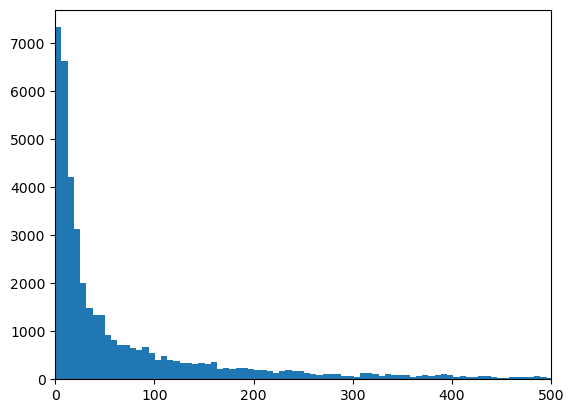

In [8]:
def average():
    median = []
    for i in events.event_number:
        x = events.reco_hits_x_w[i]
        median.append(len(x))
    arr = np.array(median)
    plt.hist(arr, 1000)
    plt.xlim(0, 500)
    median_value = np.median(arr)
    print("Median:", median_value)

average()